In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
path_to_data = 'data/ECU_IoHT.xlsx'
data = pd.read_excel(path_to_data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111207 entries, 0 to 111206
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   No.             111207 non-null  int64  
 1   Time            111207 non-null  float64
 2   Source          111207 non-null  object 
 3   Destination     111207 non-null  object 
 4   Protocol        111207 non-null  object 
 5   Length          111207 non-null  int64  
 6   Info            111207 non-null  object 
 7   Type            111207 non-null  object 
 8   Type of attack  111207 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [5]:
data.nunique()

No.               111207
Time              111205
Source                69
Destination           71
Protocol              11
Length               794
Info               24010
Type                   2
Type of attack         5
dtype: int64

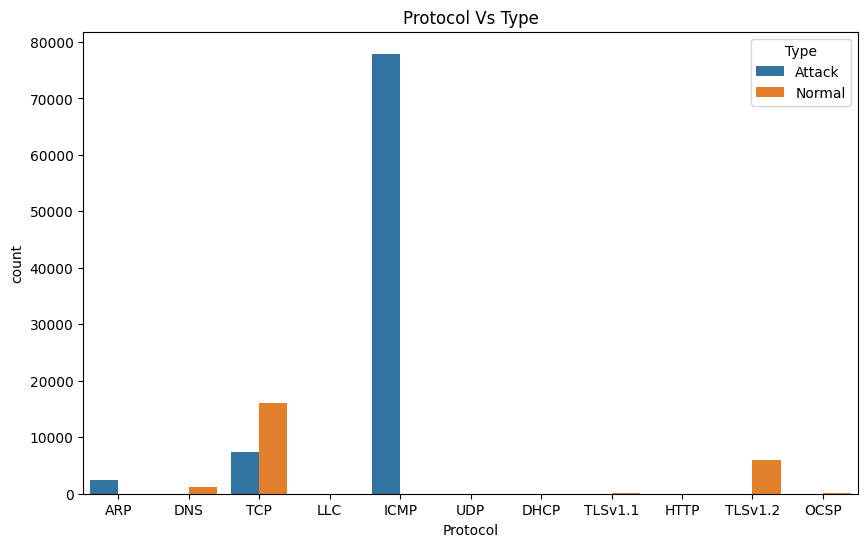

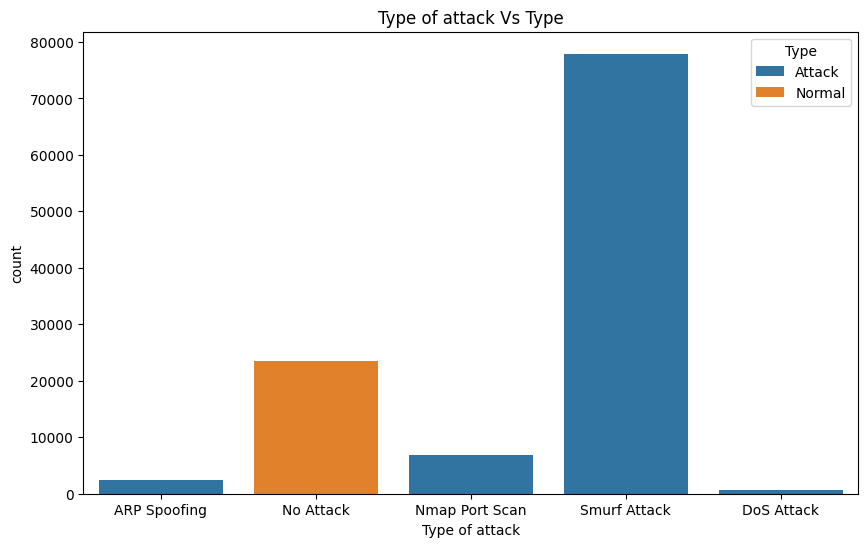

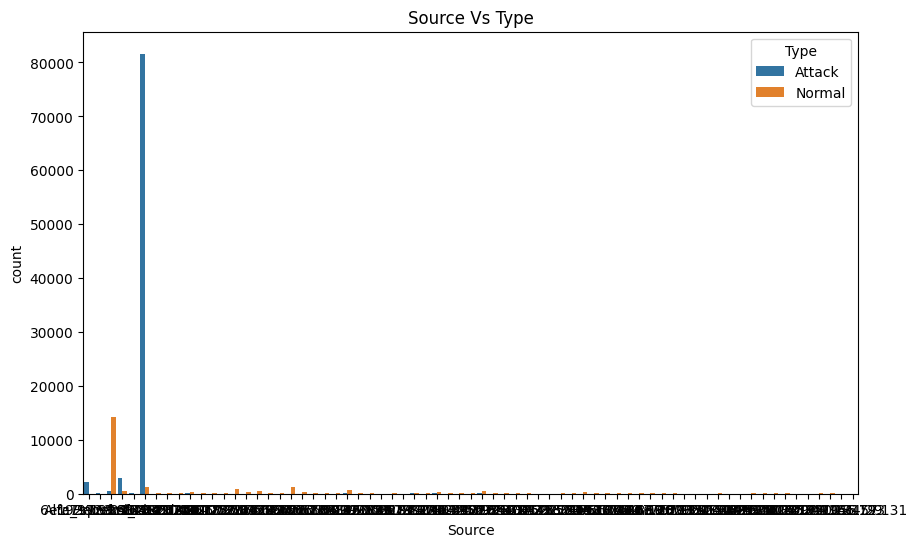

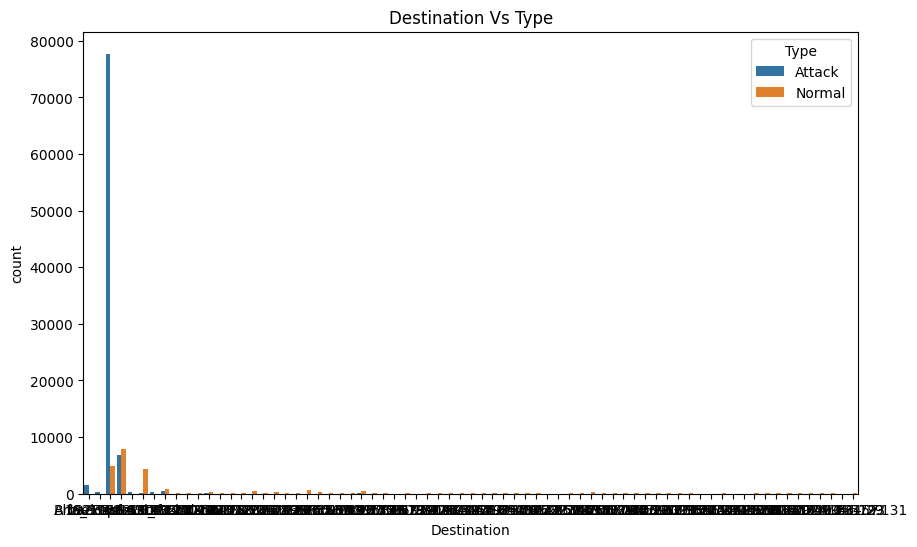

In [6]:
columns_to_plot = [
    'Protocol', 'Type of attack', 'Source', 'Destination'
]

for column in columns_to_plot:
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, hue='Type', data= data)
    plt.title(f'{column} Vs Type')
    plt.show()

In [7]:
data.drop(columns='Type of attack', inplace=True)

In [8]:
data.nunique()

No.            111207
Time           111205
Source             69
Destination        71
Protocol           11
Length            794
Info            24010
Type                2
dtype: int64

In [9]:
df_protocol_info = data[['Protocol', 'Type', 'Info']].copy()
info_by_protocol = df_protocol_info.groupby(by=['Protocol'])


In [10]:
info_by_protocol.get_group('UDP').value_counts()

Protocol  Type    Info                   
UDP       Normal  35387  >  35218 Len=300    3
                  58925  >  33403 Len=300    1
Name: count, dtype: int64

The output shows that for the **UDP** protocol, there are two distinct samples, each repeated a total of four times. The key difference between these samples is the source and destination ports (source > destination).

In [11]:
info_by_protocol.get_group('DHCP').value_counts()

Protocol  Type    Info                                     
DHCP      Normal  DHCP Request  - Transaction ID 0xabcd0001    5
                  DHCP ACK      - Transaction ID 0xabcd0001    2
                  DHCP ACK      - Transaction ID 0x93292a65    1
                  DHCP ACK      - Transaction ID 0x788b4b33    1
                  DHCP ACK      - Transaction ID 0xd05b9a12    1
                  DHCP Request  - Transaction ID 0x788b4b33    1
                  DHCP Request  - Transaction ID 0x93292a65    1
                  DHCP Request  - Transaction ID 0xd05b9a12    1
Name: count, dtype: int64

The output shows that for the **DHCP** protocol, there are eight distinct samples, each repeated a total of 13 times. The key difference between these samples is the `type of transactions` (request/acknowledgments (ACK)) and `Transaction ID`.

In [12]:
info_by_protocol.get_group('HTTP').value_counts()

Protocol  Type    Info                           
HTTP      Normal  GET /success.txt HTTP/1.1          6
                  HTTP/1.1 200 OK  (text/plain)      6
                  GET / HTTP/1.1                     1
                  HTTP/1.1 302 Found  (text/html)    1
Name: count, dtype: int64

The output shows that for the **HTTP** protocol, there are four distinct samples, each repeated a total of 14 times. The key difference between these samples is the `type` of HTTP request or response.

In [13]:
info_by_protocol.get_group('OCSP').value_counts()

Protocol  Type    Info    
OCSP      Normal  Request     63
                  Response    63
Name: count, dtype: int64

The output shows that for the **OCSP** protocol, there are two distinct samples, each repeated a total of 126 times. The key difference between these samples is the `type of transactions`. 

In [14]:
info_by_protocol.get_group('TLSv1.1').value_counts()

Protocol  Type    Info                       
TLSv1.1   Normal  Application Data               54
                  Encrypted Handshake Message    31
                  Change Cipher Spec             28
                  Client Key Exchange            27
                  Client Hello                    3
Name: count, dtype: int64

The output shows that for the **TLSv1.1** protocol, there are five distinct samples, each repeated a total of 143 times. The key difference between these samples is the `Message Types`. 

**Distinct Message Types**: The samples differ by message type, indicating various steps in the TLS handshake and data transfer process.

In [15]:
info_by_protocol.get_group('TLSv1.2').value_counts()

Protocol  Type    Info                                                                                                      
TLSv1.2   Normal  Application Data                                                                                              3975
                  Application Data [TCP segment of a reassembled PDU]                                                            748
                  Application Data, Application Data                                                                             249
                  Client Hello                                                                                                   148
                  Encrypted Alert                                                                                                139
                  Client Key Exchange, Change Cipher Spec, Encrypted Handshake Message                                           135
                  Server Hello                                               

For the TLSv1.2 protocol, the output shows various distinct message types and sequences, each repeated a certain number of times. The key difference between these samples is the `sequence` and `type of messages` involved in different stages of the TLS handshake, session establishment, and application data exchange.

The distinct samples reflect various stages and configurations of TLS communication:

`Handshake initiation` (Client Hello).
`Session setup` and `key exchange` (Server Hello, Key Exchange, Change Cipher Spec).
`Data exchange` (Application Data).
`Session closure` or `warnings` (Encrypted Alert).


In [16]:
info_by_protocol.get_group('LLC').value_counts()

Protocol  Type    Info                                                                            
LLC       Normal  U, func=Unknown; DSAP ISO Network Layer (OSLAN 1) Individual, SSAP 0xa2 Response    1
Name: count, dtype: int64

For the LLC (Logical Link Control) protocol, the log show one sample with the following detailes:
- `Type`: Normal unnumbered (U) frame.
- `DSAP`: Destination Service Access Point, set for ISO Network Layer (OSLAN 1).
- `SSAP`: Source Service Access Point, value is 0xa2 (hex).
- `Response`: Indicates it's a response frame.

In [17]:
info_by_protocol.get_group('DNS').value_counts()

Protocol  Type    Info                                                                                                                                                                             
DNS       Normal  Standard query 0x005e A api.libelium.com                                                                                                                                             8
                  Standard query 0x00e0 A api.libelium.com                                                                                                                                             7
                  Standard query 0x0062 A api.libelium.com                                                                                                                                             7
                  Standard query 0x004e A api.libelium.com                                                                                                                                             6


### Queries

The DNS queries involve several requests for IP addresses (A records) for `api.libelium.com`, each with unique transaction IDs:

1. **Standard Query**: 
   - These queries request an A record for `api.libelium.com`, which would return an IPv4 address.
   - Each query has a unique transaction ID (e.g., `0x005e`, `0x00e0`, `0x0062`), which identifies the specific query.

2. **Frequency of Queries**:
   - Repeated queries for the same domain (e.g., `api.libelium.com`) could indicate either periodic checking, retries, or redundancy in querying to ensure connectivity or due to caching policies.

### Responses

The DNS responses provide answers to queries with both **A** and **AAAA** records, returning either IPv4 or IPv6 addresses and sometimes additional information, such as CNAME (Canonical Name) records.

1. **Response Example:**
   - **`Standard query response 0xfe0f`**: 
     - Request for the A record of `www.123telugu.com` returned a **CNAME** (an alias) pointing to an Amazon ELB (Elastic Load Balancer) endpoint, and multiple **A records** with IPs `34.196.191.3`, `54.196.9.233`, `100.25.79.143`, and `3.217.97.91`.
     - This provides several IPs for load balancing, allowing the client to reach the same endpoint via multiple addresses.

2. **Additional AAAA Records**:
   - **AAAA** records return IPv6 addresses. Examples include:
     - **`pagead2.googlesyndication.com`**: Resolved to an IPv6 address `2404:6800:4006:80b::2002`.
     - **`www.mozilla.org`**: Resolved to `2606:4700::6810:8fe4` and `2606:4700::6810:8ee4`, with a **CNAME** pointing to Cloudflare (cdn.cloudflare.net), a common CDN.

3. **Record Types**:
   - **A Record**: Maps a domain to an IPv4 address.
   - **AAAA Record**: Maps a domain to an IPv6 address.
   - **CNAME Record**: Maps one domain to another domain, serving as an alias, often used to redirect traffic or simplify domain management.



In [18]:
info_by_protocol.get_group('ARP').value_counts()

Protocol  Type    Info                                                                          
ARP       Attack  192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicate use of 192.168.43.1 detected!)    727
                  192.168.43.1 is at 00:c0:ca:97:cf:63                                              171
                  192.168.43.200 is at 00:c0:ca:97:cf:63                                            171
                  Who has 192.168.43.1? Tell 192.168.43.186                                         141
                  192.168.43.1 is at 6e:c7:ec:3c:f2:ba                                              141
                                                                                                   ... 
                  Who has 192.168.43.10? Tell 192.168.43.186                                          3
                  Who has 192.168.43.110? Tell 192.168.43.186                                         3
                  Who has 192.168.43.111? Tell 192.168.43.186          

This ARP log indicates that there are 262 distinct samples with each repeated multi-times. The primary differences between the samples include:

**Standard ARP Responses**:

*192.168.43.1 is at 00:c0:ca:97:cf:63 (171 occurrences)*: A device is announcing its presence with IP 192.168.43.1 and MAC address 00:c0:ca:97:cf:63.

**ARP Requests**:

*Who has 192.168.43.1? Tell 192.168.43.186 (141 occurrences)*: Device 192.168.43.186 is requesting the MAC address for 192.168.43.1. This might be part of a repeated attempt to resolve an IP address that has conflicting MAC addresses on the network.

In [19]:
info_by_protocol.get_group('ICMP').value_counts()

Protocol  Type    Info                                                                        
ICMP      Attack  Echo (ping) request  id=0x7ee7, seq=32487/59262, ttl=64 (no response found!)    77715
                  Redirect             (Redirect for host)                                          178
                  Destination unreachable (Port unreachable)                                          4
                  Echo (ping) reply    id=0x7ee7, seq=32487/59262, ttl=128                            1
                  Echo (ping) reply    id=0x3fb3, seq=296/10241, ttl=128 (request in 8344)            1
                  Echo (ping) reply    id=0x8f02, seq=295/9985, ttl=128                               1
                  Echo (ping) reply    id=0x8f02, seq=295/9985, ttl=128 (request in 8360)             1
                  Echo (ping) reply    id=0x8f02, seq=295/9985, ttl=128 (request in 8378)             1
                  Echo (ping) reply    id=0x7ee7, seq=32487/59262, ttl=12

CMP messages, specifically ping requests and replies, along with redirect and destination unreachable notifications. Here’s a summary of each type:

- `Echo (Ping) Request and Reply`: Used to check host reachability. Each request has a **unique ID**, s**equence number**, and **TTL** (Time-To-Live). A "no response found" message suggests the destination didn’t respond, possibly due to network filtering or firewall rules.
- `Redirect`: Signals a suggestion for a different route, which can improve network efficiency. However, frequent redirects (178 here) might indicate network configuration issues or potentially malicious rerouting.
- `Destination Unreachable (Port Unreachable)`: Indicates that a port is closed or unreachable, possibly due to firewall rules or downed services. Multiple occurrences might indicate network probing.

In [37]:
info_by_protocol.get_group('TCP').value_counts()

Protocol  Type    Info                                                                  
TCP       Normal  [TCP Retransmission] 27790  >  443 [SYN] Seq=0 Win=5840 Len=0 MSS=1460    6
                  [TCP Retransmission] 24381  >  443 [SYN] Seq=0 Win=5840 Len=0 MSS=1460    6
                  [TCP Retransmission] 4586  >  443 [SYN] Seq=0 Win=5840 Len=0 MSS=1460     6
                  [TCP Retransmission] 3724  >  443 [SYN] Seq=0 Win=5840 Len=0 MSS=1460     6
                  [TCP Retransmission] 24679  >  443 [SYN] Seq=0 Win=5840 Len=0 MSS=1460    6
                                                                                           ..
          Attack  100  >  33281 [RST, ACK] Seq=1 Ack=1 Win=5840 Len=0                       1
                  100  >  36954 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0                          1
                  100  >  43399 [RST, ACK] Seq=1 Ack=1 Win=5840 Len=0                       1
                  100  >  57831 [RST, ACK] Seq=1 Ack=1 Win=5840 L

UDP, DHCP , TLSv1.1 , TLSv1.2 , HTTP , OCSP , LLC ,DNS Protocols has only Normal Type 

ARP, ICMP Protocols has only Attack Type

TCP is the only Protocol that have both types